# Data Download + NA check

In [2]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=aec980d8bd104e7cb3497b4c627337b983bb2d1de7fd75f725530dca41a41bb4
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [3]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=d6f08203afc219eeb452943b0cfca774e535b2e196a450cd2c7274be5b6ad51f
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [4]:
import langdetect
from importlib.metadata import version
version('langdetect')

'1.0.9'

In [5]:
! pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 4.1 MB/s eta 0:00:00


In [6]:
! pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.7 MB/s eta 0:00:00


In [ ]:
# ! pip install pycontractions

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
import nltk
from autocorrect import Speller
import unidecode
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tag.stanford import StanfordNERTagger
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
nltk.download("omw-1.4")
import contractions
# from pycontractions import Contractions
from contractions import *
from gensim import corpora

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
reviews = pd.read_csv("/content/drive/MyDrive/UoM/Dissertation/reviews.csv")
reviews.rename(columns = {"id":"review_id"}, inplace = True)
listings = pd.read_csv("/content/drive/MyDrive/UoM/Dissertation/listings.csv")

In [ ]:
reviews.isna().sum()  #Check on NA in comments

listing_id        0
review_id         0
date              0
reviewer_id       0
reviewer_name     0
comments         52
dtype: int64

In [ ]:
reviews = reviews[reviews['comments'].isna()==False]  #Cleaning from NA comments

In [ ]:
listings[["id", "property_type"]].isna().sum()  #Check on NA in listing

id               0
property_type    0
dtype: int64

In [ ]:
full_data = pd.merge(reviews,
    listings[["id", 'host_id', \
              'host_name', 'property_type', 'room_type']],
    how="left",
    left_on="listing_id",
    right_on="id",
    left_index=False,
    right_index=False)

In [ ]:
len(full_data)

351465

In [ ]:
full_data.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'reviewer_name',
       'comments', 'id', 'host_id', 'host_name', 'property_type', 'room_type'],
      dtype='object')

In [ ]:
full_data['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [ ]:
full_data.drop(['property_type'],axis=1, inplace=True)
full_data['date'] = pd.to_datetime(full_data['date'], format='%Y-%m-%d')
full_data['year'] = pd.DatetimeIndex(full_data['date']).year

In [ ]:
len(full_data['listing_id'].unique())

5790

# Data Cleaning



In [ ]:
start = time.time()
full_data["len_names"] = full_data['host_name'].apply(lambda x: len(word_tokenize(x)))
end = time.time()
print(end - start)
full_data["len_names2"] = full_data['host_name'].apply(lambda x: len(x))
# full_data[full_data["len_names2"]<3]["host_name"].unique()
# List of exceptions:
exception_names= ["D",'San Francisco Life', "Shane In SF", 'The Twist', "The Cabinets", "AC And Linda", 'Ellen B','Manuel R',\
  'The Bartlett','B.','Travel En', 'Good Life Resorts', 'Thomas N.','The V', 'La Familia','L.','Ulrich T.',\
                  'Bed|N|Build #6','VK & Div', 'Tobias Z', 'M.', "Sonder (San Francisco)", 'Red Awning', 'The Americania Hotel',\
       'An Elegant Hotel', 'Queen Anne Hotel','Hotel Vertigo','Axiom Hotel','Galleria Park','Harbor Court Hotel', 'Hotel Spero', 'The Marker San Francisco',\
       'Extra Holidays®','Hotel Bijou','Hotel Zeppelin', 'Hotel Zetta', 'Club Quarters San Francisco',\
       'The New', 'Hotel Drisco','Hotel Zelos', 'Hotel Des Arts','1906 Mission', 'Hotel 32One','Edwardian Hotel',\
                  'Julia L.', 'White Swan Inn', 'The Landing', 'Tina C.','E J', 'Marina Motel', 'Hayes Valley Inn','John L', 'Hotel Caza',\
                  'San Francisco', 'Park Royal Powell Place At Nob Hill', 'Dorel SF','The Metro Hotel', 'Dennis J.','Phoenix Hotel', 'Hotel Del Sol',\
                   'Maan M.', 'Music City', 'Air Concierge', 'Deborah Brand', 'Synergy Global', 'Helot Company',\
       'Perfect Holiday','Elite Escapes','RoomPicks By Victoria', 'Stay At Clay', 'Suite Life','LiveSuite.Io SE',\
                  'Powell Place','Humphrey LLC', 'Ying Y','C.J.','Mission Dolores','Zeus SF',"Edmund C","N","RedAwning"]
exception_names.extend(full_data[full_data["len_names2"]<3]["host_name"].unique())
# exception_names

35.94113230705261


In [ ]:
full_data = full_data[np.logical_or(full_data['room_type']=="Entire home/apt", full_data['room_type']=="Private room")]

In [ ]:
exception_names = pd.DataFrame(exception_names)   #78 exceptions
exception_names["tag"] = ["hotel" if "hotel" in name else "NA" for name in exception_names[0].apply(lambda x: x.lower()) ]
exception_names.to_csv("exceptions.csv", sep=',', index=False)

In [ ]:
# exception_names #125 len

In [ ]:
exception_names = pd.read_csv('/content/drive/MyDrive/UoM/Dissertation/exceptions_tagged.csv', sep = ";")

In [ ]:
exception_names

,0,tag
0,D,nick
1,San Francisco Life,nick
2,Shane In SF,name1
3,The Twist,nick
4,The Cabinets,nick
...,...,...
120,Xu,nick
121,Tj,nick
122,Qu,nick
123,東霖,nick


In [ ]:
hotel_business_names = exception_names[np.logical_or(exception_names["tag"]=="hotel",exception_names["tag"]=="business")]['0'].values
name1 = exception_names[exception_names["tag"]=="name1"]['0'].values
name3 = exception_names[exception_names["tag"]=="name3"]['0'].values
nick_names = exception_names[np.logical_or(exception_names["tag"]=="nick",exception_names["tag"]=="nick ")]['0'].values

In [ ]:
full_data = full_data[~full_data["host_name"].isin(hotel_business_names)]

In [ ]:
len(full_data[full_data["host_name"].isin(nick_names)])

8291

# Descriptive Statistics

In [ ]:
len(full_data)

332573

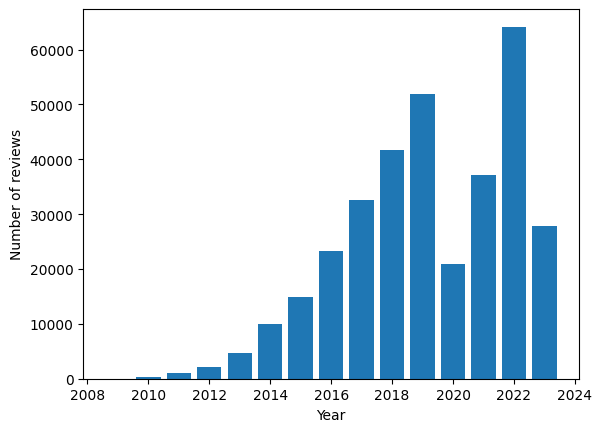

In [ ]:
year_count = pd.DataFrame()
year_count['count'] = full_data.groupby(by = ["year"])['year'].count()
year_count = year_count.reset_index()
fig, ax = plt.subplots()
ax.bar(x =year_count["year"],  height = year_count['count'])

ax.set_ylabel('Number of reviews')
ax.set_xlabel('Year')
plt.show()

In [ ]:
year_count

,year,count
0,2009,34
1,2010,278
2,2011,999
3,2012,2145
4,2013,4637
5,2014,10012
6,2015,14976
7,2016,23370
8,2017,32513
9,2018,41774


In [ ]:
full_data = full_data[full_data["year"]>2013]

In [ ]:
full_data.groupby(by = ["room_type"])['room_type'].count() #324 480

room_type
Entire home/apt    196815
Private room       127665
Name: room_type, dtype: int64

In [ ]:
pd.pivot_table(full_data, values='review_id', index=['year'], columns=['room_type'], aggfunc='count')


room_type,Entire home/apt,Private room
year,,
2014,6453,3559
2015,9184,5792
2016,14381,8989
2017,18996,13517
2018,23785,17989
2019,28719,23154
2020,13946,6890
2021,24822,12255
2022,39013,25155


In [ ]:
len(full_data)

324480

# Sample extraction / Work with full Data

In [ ]:
# sample1 = full_data.sample(n=10000, random_state=17)

In [ ]:
sample1 = full_data.copy()

# Text Preprocessing

## Language Detection (~ 33 mins on full data)

In [ ]:
start = time.time()
from langdetect import detect, detect_langs
def try_detect(review):
    try:
        return detect(review)
    except:
        return "UNDETECTED"
sample1['language'] = sample1['comments'].apply(lambda x: try_detect(x))
end = time.time()
print(end - start)

1815.8398873806


In [ ]:
sample1[sample1['language']=='UNDETECTED'] #Manual Check

,listing_id,review_id,date,reviewer_id,reviewer_name,comments,id,host_id,host_name,room_type,year,len_names,len_names2,language
233,958,139292569,2017-03-24,1910464,Isolina,.,958,1169,Holly,Entire home/apt,2017,1,5,UNDETECTED
1256,958,710784956,2020-11-22,375220251,Joshua,10/10,958,1169,Holly,Entire home/apt,2020,1,5,UNDETECTED
2712,166199,251823134,2018-04-08,5571404,Anthony,+,166199,792371,Matt,Entire home/apt,2018,1,4,UNDETECTED
6353,545685,144879934,2017-04-16,105756621,Madelynn,.....,545685,2676602,Su,Entire home/apt,2017,1,2,UNDETECTED
7133,208831,160557565,2017-06-14,47935341,John,?,208831,1028577,Peter,Entire home/apt,2017,1,5,UNDETECTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347306,740921354771669048,823275196339443697,2023-02-09,419421343,Mauricio,.,740921354771669048,115109717,Anthony & Ava,Entire home/apt,2023,3,13,UNDETECTED
347327,721656359894396917,758863429526656898,2022-11-12,1312805,Rick,.,721656359894396917,469250438,Charles,Private room,2022,1,7,UNDETECTED
347556,742503401552228857,867471550142096425,2023-04-11,445784281,Fabio,👍.,742503401552228857,484487764,Alice,Private room,2023,1,5,UNDETECTED
347983,725456832824318186,744969823389079554,2022-10-24,77972448,Joshua,.,725456832824318186,12650793,John,Entire home/apt,2022,1,4,UNDETECTED


In [ ]:
sample1[sample1['language']!='en']

,listing_id,review_id,date,reviewer_id,reviewer_name,comments,id,host_id,host_name,room_type,year,len_names,len_names2,language
9,138592,18049713,2014-08-21,4604918,Sonia,La maison de Julie et Brad est vraiment un rêv...,138592,648553,Julie & Brad,Entire home/apt,2014,3,12,fr
39,468490,357264628,2018-12-09,36048141,David,Ehh,468490,285168,Bill,Entire home/apt,2018,1,4,de
61,138592,273936194,2018-06-07,181228816,Daniel,"Großartiges Haus, nette Umgebung und tolle Gas...",138592,648553,Julie & Brad,Entire home/apt,2018,3,12,de
76,958,20751295,2014-10-05,19405174,Inger,Vi bodde väldigt bra hos Holly! Vi blev väl mo...,958,1169,Holly,Entire home/apt,2014,1,5,sv
83,958,39423363,2015-07-23,24284061,Gabriela,Una parte muy importante de cada viaje es el l...,958,1169,Holly,Entire home/apt,2015,1,5,es
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351342,881168729030149392,896441543707667363,2023-05-21,147389852,Lesly,"Es un hospedaje increíble, vale 1000% la pena,...",881168729030149392,469712552,Mission Dolores,Private room,2023,2,15,es
351348,881387275712406988,895774640829691083,2023-05-20,277253634,Rohit,Amazing views.,881387275712406988,508401669,Geo,Entire home/apt,2023,1,3,af
351376,874165191021628920,898646099909859737,2023-05-24,75372874,Jennifer,Wir haben ein paar Nächte im Marina Hotel über...,874165191021628920,85893340,Marina-Motel,Private room,2023,1,12,de
351397,882680461355789506,612578951,2020-02-29,327023324,Aliaksei,Отличный хозяин. Снимали апартаменты в Сан-Фр...,882680461355789506,511930449,Zeus SF,Entire home/apt,2020,2,7,ru


In [ ]:
sample1.groupby(by = ["language"])['language'].count() #324480

language
UNDETECTED       526
af               359
ar                 2
bg                 2
ca               257
cs               166
cy                71
da               153
de              3187
el                 4
en            304648
es              2895
et                41
fi                54
fr              5434
he                31
hr                47
hu                51
id                56
it               583
ja               210
ko              1019
lt                 5
lv                 5
mk                 2
nl               437
no               156
pl               145
pt               490
ro               877
ru               118
sk                19
sl                24
so               354
sq                 1
sv               155
sw                68
th                 5
tl               194
tr                36
uk                 2
vi                36
zh-cn           1462
zh-tw             93
Name: language, dtype: int64

In [ ]:
pd.pivot_table(sample1, values='comments', index=['year'], columns=['language'], aggfunc='count')

language,UNDETECTED,af,ar,bg,ca,cs,cy,da,de,el,...,sq,sv,sw,th,tl,tr,uk,vi,zh-cn,zh-tw
year,,,,,,,,,,,,,,,,,,,,,
2014,NaN,1.0,NaN,NaN,3.0,NaN,NaN,5.0,85.0,NaN,...,NaN,5.0,1.0,NaN,2.0,NaN,NaN,NaN,4.0,1.0
2015,1.0,4.0,NaN,NaN,5.0,3.0,1.0,14.0,188.0,NaN,...,NaN,16.0,NaN,NaN,1.0,2.0,NaN,1.0,58.0,5.0
2016,8.0,20.0,NaN,NaN,10.0,7.0,4.0,19.0,243.0,1.0,...,NaN,24.0,1.0,1.0,11.0,3.0,NaN,NaN,190.0,5.0
2017,46.0,32.0,NaN,1.0,17.0,14.0,8.0,14.0,403.0,NaN,...,NaN,24.0,6.0,NaN,8.0,1.0,1.0,3.0,325.0,12.0
2018,70.0,49.0,NaN,NaN,41.0,21.0,8.0,34.0,516.0,2.0,...,NaN,34.0,9.0,NaN,20.0,4.0,NaN,8.0,307.0,21.0
2019,102.0,56.0,1.0,NaN,54.0,22.0,13.0,16.0,677.0,NaN,...,1.0,18.0,10.0,NaN,29.0,3.0,NaN,4.0,343.0,21.0
2020,47.0,21.0,NaN,NaN,14.0,13.0,3.0,6.0,39.0,1.0,...,NaN,3.0,8.0,NaN,21.0,1.0,NaN,5.0,66.0,3.0
2021,68.0,47.0,NaN,NaN,23.0,19.0,5.0,6.0,22.0,NaN,...,NaN,5.0,11.0,NaN,26.0,6.0,NaN,6.0,17.0,4.0
2022,139.0,88.0,NaN,NaN,56.0,44.0,20.0,24.0,657.0,NaN,...,NaN,18.0,16.0,4.0,51.0,9.0,1.0,7.0,73.0,9.0


In [ ]:
sample1 = sample1[sample1['language']=='en']

## Len of comments after language detection + Add filter based on literature

In [ ]:
sample1['comment_lec']=sample1['comments'].apply(lambda x: len(word_tokenize(x)))
sample1 = sample1[sample1['comment_lec']> 15]

In [ ]:
sample1['comment_lec'].describe()

count    252104.000000
mean         65.213551
std          54.617003
min          16.000000
25%          31.000000
50%          50.000000
75%          81.000000
max        1131.000000
Name: comment_lec, dtype: float64

## HTML tags + Emojies removal + Unidecode + Punctuation + Numbers

In [ ]:
sample1["comments"]

8         We (a family of 5) felt privileged to stay in ...
11        Impeccable taste, great space, great host. The...
12        Really don't know what to say other THANKS Bil...
13        Bill was a wonderful and friendly host to our ...
14        Two of my colleagues and I stayed with Bill fo...
                                ...                        
351454    Adam and Yao are fantastic helpful and warm ho...
351455    Excellent host with fantastic recommendations ...
351458    super convenient location and beautiful apartm...
351460    Fantastic stay in a beautiful old home. Very q...
351461    I don’t recommend this place at all. I faced s...
Name: comments, Length: 252104, dtype: object

In [ ]:
"It's a great place".split(" ")
contractions.fix("It's")

'It is'

In [ ]:
def contr_remove(review):
  fixed_review = [contractions.fix(word) for word in review.split(" ")]
  return " ".join(fixed_review)

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, ' ', data)

def remove_html_tags(data):
  html_tags = re.compile("<.*?>", re.UNICODE)
  return re.sub(html_tags, ' ', data)

sample1['comments'] = sample1['comments'].apply(lambda x: contr_remove(x))
sample1['comments'] = sample1['comments'].apply(lambda x: remove_emojis(x))
sample1['comments'] = sample1['comments'].apply(lambda x: remove_html_tags(x))
sample1['comments'] = sample1['comments'].apply(lambda x: unidecode.unidecode(x))
sample1['comments'] = sample1['comments'].apply(lambda x: x.replace("'s", ' '))
sample1['comments'] = sample1['comments'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
sample1['comments'] = sample1['comments'].apply(lambda x: re.sub(r'[0-9]', ' ', x))
sample1['comments'] = sample1['comments'].apply(lambda x: re.sub(' +', ' ', x))

In [ ]:
sample1["comments"]

8         We a family of felt privileged to stay in this...
11        Impeccable taste great space great host The ap...
12        Really do not know what to say other THANKS Bi...
13        Bill was a wonderful and friendly host to our ...
14        Two of my colleagues and I stayed with Bill fo...
                                ...                        
351454    Adam and Yao are fantastic helpful and warm ho...
351455    Excellent host with fantastic recommendations ...
351458    super convenient location and beautiful apartm...
351460    Fantastic stay in a beautiful old home Very qu...
351461    I do not recommend this place at all I faced s...
Name: comments, Length: 252104, dtype: object

## Data Normalization

In [ ]:
start = time.time()
sample1['comments'] = sample1.comments.apply(lambda x: x.lower())
end = time.time()
print(end - start)

0.293734073638916


## Name -> Host

In [ ]:
sample1.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'reviewer_name',
       'comments', 'id', 'host_id', 'host_name', 'room_type', 'year',
       'len_names', 'len_names2', 'language', 'comment_lec'],
      dtype='object')

In [ ]:
import copy
sample1["host_name_changed"] = copy.deepcopy(sample1["host_name"])
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.lower())
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.replace("&", " "))
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.replace(" n ", " "))
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.replace("(", " "))
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.replace(")", " "))
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.replace("+", " "))
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.replace(",", " "))
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.replace("dr.", " "))
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.replace(".", " "))
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.replace("/", " "))
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.replace("-", " "))
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.replace(";", " "))
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.replace("family", " "))
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.replace("friends", " "))
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.replace("2", " "))
sample1["host_name_changed"] = sample1["host_name_changed"].apply(lambda x: x.replace("the ", " "))
sample1[sample1['len_names']>1]["host_name_changed"] = sample1[sample1['len_names']>1]['host_name_changed'].apply(lambda x: x.replace("and", " "))





<ipython-input-51-c3653e896fea>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample1[sample1['len_names']>1]["host_name_changed"] = sample1[sample1['len_names']>1]['host_name_changed'].apply(lambda x: x.replace("and", " "))


In [ ]:
len(full_data[full_data["host_name"].isin(nick_names)]) #8291 reviews in total for possible double check

7923

In [ ]:
len(sample1[sample1["host_name"].isin(nick_names)]) #250

5798

In [ ]:
sample1 = sample1[~sample1["host_name"].isin(nick_names)]

In [ ]:
sample1['comments'].values

array(['we a family of felt privileged to stay in this spacious light house in a quiet street in the civilized part of mission district especially the kids loved the bath and for them it was a little hard in the beginning of the stay to deal with no tv in the house the beds which were sleeping very well well equiped hous and kitchen great views from the balcony and a house where you realize you live more in the back than in the front dolores park around the corner walks to mission downhill and castro uphill not for the faint harted but highly rewarding the j line stop almost on your door step opens the rest of the city for you \r ',
       'impeccable taste great space great host the apartment is amazing also located a block away from the iconic lombard street everyone had a great time ',
       'really do not know what to say other thanks bill you were very accommodating and understanding of our needs really cannot wait to get back out there again ',
       ...,
       'excellent host

In [ ]:
def name_to_host(review, name, changed_name):
  review = " "+review
  if name not in exception_names['0'].values:
    changed_name = changed_name.lower()
    changed_name = word_tokenize(changed_name)
    review = review.lower()
    for n in changed_name:
      space_n = " "+n+" "
      if space_n in review and n!="and":
        # review = review.replace(n, "host")
        review = review.replace(space_n, " host ")
    return review
  elif name in name1:
    changed_name = changed_name.lower()
    changed_name = word_tokenize(changed_name)
    review = review.replace(changed_name[0], "host")
    return review
  elif name in name3:
    changed_name = changed_name.lower()
    changed_name = word_tokenize(changed_name)
    review = review.replace(changed_name[-1], "host")
    return review
  else:
    return review

start = time.time()
sample1["comments"]=sample1["comments"].apply(lambda x: x.replace(".", " . "))
sample1["comments"]=sample1["comments"].apply(lambda x: x.replace(",", " , "))
sample1["comments"]=sample1["comments"].apply(lambda x: x.replace(";", " ; "))
sample1["comments"]=sample1["comments"].apply(lambda x: x.replace("-", " - "))
sample1["comments"]=sample1[["comments","host_name","host_name_changed"]].apply(lambda x: name_to_host(x['comments'], x['host_name'], x['host_name_changed']), axis=1)
end = time.time()
print(end-start)

# Additional replacements
sample1['comments'].replace(r'\bShe\b', 'host', regex=True, inplace= True)
sample1['comments'].replace(r'\bshe\b', 'host', regex=True, inplace= True)
sample1['comments'].replace(r'\bhe\b', 'host', regex=True, inplace= True)
sample1['comments'].replace(r'\bHe\b', 'host', regex=True, inplace= True)
sample1['comments'].replace(r'\bthey\b', 'host', regex=True, inplace= True)
sample1['comments'].replace(r'\bThey\b', 'host', regex=True, inplace= True)
sample1['comments'].replace(r'\bperson\b', 'host', regex=True, inplace= True)
sample1['comments'].replace(r'\bPerson\b', 'host', regex=True, inplace= True)
sample1['comments'].replace(r'\bHosts\b', 'host', regex=True, inplace= True)
sample1['comments'].replace(r'\bhosts\b', 'host', regex=True, inplace= True)
sample1['comments'].replace(r'\bcommunicator\b', 'host', regex=True, inplace= True)
sample1['comments'].replace(r'\bcampanion\b', 'host', regex=True, inplace= True)
sample1['comments'].replace(r'\blandlord\b', 'host', regex=True, inplace= True)
sample1['comments'].replace(r'\bhosts\b', 'host', regex=True, inplace= True)

# Fixing the problems of 2 names / double names
sample1["comments"]=sample1["comments"].apply(lambda x: x.replace("host host", "host"))
sample1["comments"]=sample1["comments"].apply(lambda x: x.replace("host and host", "host"))

35.099037408828735


In [ ]:
sample1['comments'] # actually worked

8          we a family of felt privileged to stay in thi...
11         impeccable taste great space great host the a...
12         really do not know what to say other thanks h...
13         host was a wonderful and friendly host to our...
14         two of my colleagues and i stayed with host f...
                                ...                        
351452     host and yao place is a quintessential san fr...
351454     host and yao are fantastic helpful and warm h...
351455     excellent host with fantastic recommendations...
351458     super convenient location and beautiful apart...
351461     i do not recommend this place at all i faced ...
Name: comments, Length: 246306, dtype: object

In [ ]:
sample1

,listing_id,review_id,date,reviewer_id,reviewer_name,comments,id,host_id,host_name,room_type,year,len_names,len_names2,language,comment_lec,host_name_changed
8,138592,16451511,2014-07-28,8684060,Kathelijne,we a family of felt privileged to stay in thi...,138592,648553,Julie & Brad,Entire home/apt,2014,3,12,en,141,julie brad
11,468490,11116644,2014-03-21,10220650,Harry,impeccable taste great space great host the a...,468490,285168,Bill,Entire home/apt,2014,1,4,en,32,bill
12,468490,11367034,2014-03-31,12910342,Maxx,really do not know what to say other thanks h...,468490,285168,Bill,Entire home/apt,2014,1,4,en,32,bill
13,468490,20715620,2014-10-04,9967020,Amalie,host was a wonderful and friendly host to our...,468490,285168,Bill,Entire home/apt,2014,1,4,en,33,bill
14,468490,25413334,2015-01-15,17050547,Anthony,two of my colleagues and i stayed with host f...,468490,285168,Bill,Entire home/apt,2015,1,4,en,46,bill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351452,884390038934087158,901530295012973099,2023-05-28,221068968,Jihye,host and yao place is a quintessential san fr...,884390038934087158,704593,Adam,Private room,2023,1,4,en,108,adam
351454,884427616050550439,900806802089082072,2023-05-27,34463190,Martina,host and yao are fantastic helpful and warm h...,884427616050550439,704593,Adam,Private room,2023,1,4,en,108,adam
351455,884427616050550439,902341244747807633,2023-05-29,56068214,Bryenn,excellent host with fantastic recommendations...,884427616050550439,704593,Adam,Private room,2023,1,4,en,32,adam
351458,884829457526133581,905948085273680093,2023-06-03,437751017,Christina,super convenient location and beautiful apart...,884829457526133581,8293765,Tom,Private room,2023,1,3,en,17,tom


In [ ]:
# sample1[sample1["check_required"] == "True"]

## San Francisco -> city

In [ ]:
sample1['comments'] = sample1['comments'].str.replace(" sf "," city ")
sample1['comments'] = sample1['comments'].str.replace(" san francisco "," city ")
sample1['comments'] = sample1['comments'].str.replace(" sanfrancisco "," city ")
sample1['comments'] = sample1['comments'].str.replace(" san fran "," city ")
sample1['comments'] = sample1['comments'].str.replace(" sanfran "," city ")

## Host count

In [ ]:
# df['Host']=df['comments'].str.contains("host")# if host is mentioned in the review

sample1['host_freq']= sample1['comments'].apply(lambda x: x.count('host'))
sample1['host_freq'].describe()



count    246306.000000
mean          1.450017
std           1.455914
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          37.000000
Name: host_freq, dtype: float64

In [ ]:
sample1[sample1['host_freq']>15]

,listing_id,review_id,date,reviewer_id,reviewer_name,comments,id,host_id,host_name,room_type,year,len_names,len_names2,language,comment_lec,host_name_changed,host_freq
104,468490,488087100,2019-07-14,4013470,Frank,host home is nice but not quite as advertised...,468490,285168,Bill,Entire home/apt,2019,1,4,en,687,bill,16
4028,183859,270288584,2018-05-28,51024977,Erica,there is so much to love about this flat the ...,183859,882283,Stephen,Entire home/apt,2018,1,7,en,602,stephen,18
6370,18904,73624101,2016-05-09,63399718,Gregory,this was our first experience with airbnb and...,18904,72464,Patrick,Private room,2016,1,7,en,531,patrick,16
18916,57561,189180812,2017-09-01,48516436,Joohwan,the host informed that we can check in after ...,57561,272890,Theodore,Entire home/apt,2017,1,8,en,339,theodore,19
23432,348714,28569496,2015-03-26,23501535,Lila,the property was clean and easy to get to and...,348714,78610,George,Private room,2015,1,6,en,583,george,20
28435,719431,465204040159772460,2021-10-03,261635240,Regina,there was another couple in the room when i a...,719431,783438,Phil,Entire home/apt,2021,1,4,en,526,phil,19
34110,734839,9538137,2014-01-02,8538729,Emma,my husband and children and i stayed at host ...,734839,3832802,Kenji,Entire home/apt,2014,1,5,en,561,kenji,21
54795,1673777,618203850248129415,2022-05-02,5316050,Francesca,tl dr we raised safety concerns and issues re...,1673777,8860167,William,Entire home/apt,2022,1,7,en,1131,william,37
62648,1785463,701972462,2020-10-19,108080420,Christina,as the other reviewers warned yes there are a...,1785463,5565510,Lulu,Private room,2020,1,4,en,502,lulu,19
69087,1864390,463681664,2019-06-03,5444345,Ed,the location of this unit is great right off ...,1864390,9686057,Kaleen,Entire home/apt,2019,1,6,en,485,kaleen,18


In [ ]:
sample1[sample1['host_freq']>5]

,listing_id,review_id,date,reviewer_id,reviewer_name,comments,id,host_id,host_name,room_type,year,len_names,len_names2,language,comment_lec,host_name_changed,host_freq
96,138592,723221172754482897,2022-09-24,4618252,Theresa,host home exceeded our expectations in every ...,138592,648553,Julie & Brad,Entire home/apt,2022,3,12,en,290,julie brad,8
104,468490,488087100,2019-07-14,4013470,Frank,host home is nice but not quite as advertised...,468490,285168,Bill,Entire home/apt,2019,1,4,en,687,bill,16
108,468490,709234664,2020-11-15,172206258,Adekunle,so booking this place was a hassle for me and...,468490,285168,Bill,Entire home/apt,2020,1,4,en,334,bill,15
153,468490,725420518592661792,2022-09-27,451669612,Lisa,my husband and i live locally and had our wed...,468490,285168,Bill,Entire home/apt,2022,1,4,en,246,bill,7
156,958,72363518,2016-05-02,59596298,Eric,well of course there is no place like home bu...,958,1169,Holly,Entire home/apt,2016,1,5,en,209,holly,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350922,824047084487341932,892172874424185869,2023-05-15,77268232,Annette,my husband and i with our little dogs stayed ...,824047084487341932,775963,Eileen,Entire home/apt,2023,1,6,en,120,eileen,6
351055,840755927573523585,882707001725194817,2023-05-02,112399306,Margo,host was an amazing host was responsive and v...,840755927573523585,75100142,Henri,Entire home/apt,2023,1,5,en,118,henri,6
351281,851649059337205429,871158242995047026,2023-04-16,508392927,Felicia,host home was absolutely beautiful and even n...,851649059337205429,45568373,Leanne,Entire home/apt,2023,1,6,en,118,leanne,6
351288,880087525726054616,894320778954965402,2023-05-18,471008405,Adriana,host is the best host we have ever booked wit...,880087525726054616,176026959,Juan Pablo,Entire home/apt,2023,2,10,en,125,juan pablo,6


## Stemmatization + Stop Words + Punctuation + Numbers  ~ 3 hours for full data

In [ ]:
sample1

,listing_id,review_id,date,reviewer_id,reviewer_name,comments,id,host_id,host_name,room_type,year,len_names,len_names2,language,comment_lec,host_name_changed,host_freq
8,138592,16451511,2014-07-28,8684060,Kathelijne,we a family of felt privileged to stay in thi...,138592,648553,Julie & Brad,Entire home/apt,2014,3,12,en,141,julie brad,0
11,468490,11116644,2014-03-21,10220650,Harry,impeccable taste great space great host the a...,468490,285168,Bill,Entire home/apt,2014,1,4,en,32,bill,1
12,468490,11367034,2014-03-31,12910342,Maxx,really do not know what to say other thanks h...,468490,285168,Bill,Entire home/apt,2014,1,4,en,32,bill,1
13,468490,20715620,2014-10-04,9967020,Amalie,host was a wonderful and friendly host to our...,468490,285168,Bill,Entire home/apt,2014,1,4,en,33,bill,2
14,468490,25413334,2015-01-15,17050547,Anthony,two of my colleagues and i stayed with host f...,468490,285168,Bill,Entire home/apt,2015,1,4,en,46,bill,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351452,884390038934087158,901530295012973099,2023-05-28,221068968,Jihye,host and yao place is a quintessential city v...,884390038934087158,704593,Adam,Private room,2023,1,4,en,108,adam,2
351454,884427616050550439,900806802089082072,2023-05-27,34463190,Martina,host and yao are fantastic helpful and warm h...,884427616050550439,704593,Adam,Private room,2023,1,4,en,108,adam,4
351455,884427616050550439,902341244747807633,2023-05-29,56068214,Bryenn,excellent host with fantastic recommendations...,884427616050550439,704593,Adam,Private room,2023,1,4,en,32,adam,1
351458,884829457526133581,905948085273680093,2023-06-03,437751017,Christina,super convenient location and beautiful apart...,884829457526133581,8293765,Tom,Private room,2023,1,3,en,17,tom,2


In [ ]:
stop_words = pd.read_csv("/content/drive/MyDrive/UoM/Dissertation/smart_stop.csv")
stop_list = list(stop_words["stop_list"])
spell = Speller('en')

def stop_words_remover_and_stem(review):
  ps = PorterStemmer()
  review_splited = spell(review)
  review_splited = review_splited.split(" ")
  new_str = [ps.stem(w) for w in review_splited if w not in stop_list]
  new_review = ' '.join(new_str)
  return new_review


In [ ]:
sample1['comments'].replace('_how_', ' how ', inplace= True)
sample1['comments'].replace('____', ' ',  inplace= True)
sample1['comments'].replace('abnb', 'airbnb',  inplace= True)
sample1['comments'].replace('aibnb', 'airbnb',  inplace= True)
sample1['comments'].replace('airbn', 'airbnb',  inplace= True)
sample1['comments'].replace('airbnbit', 'airbnb',  inplace= True)
sample1['comments'].replace('airbnd', 'airbnb',  inplace= True)
sample1['comments'].replace('airbnbs', 'airbnb',  inplace= True)
sample1['comments'].replace('air bnb', 'airbnb',  inplace= True)
sample1['comments'].replace('airb&b', 'airbnb',  inplace= True)
sample1['comments'].replace('air b&b', 'airbnb',  inplace= True)
sample1["comments"] = sample1["comments"].apply(lambda x: stop_words_remover_and_stem(x))
end = time.time()
print(end-start)



14293.856986761093


In [ ]:
sample1["comments"].values

array([' famili felt privileg stay spaciou light hous quiet street civil part mission district kid love bath hard begin stay deal tv hous bed sleep equip hous kitchen great view balconi hous realiz live back front color park corner walk mission downhil castro uphil faint chart highli reward line stop door step open rest citi \r ',
       ' impecc tast great space great host apart amaz locat block icon bombard street great time ',
       ' host accommod understand wait back ', ...,
       ' excel host fantast recommend banter great locat neighborhood copi peac ',
       ' super conveni locat beauti apart luci cute host great host',
       ' recommend place face issu host respons compens issu bathroom dirti water leak middl hous smell lot nois night '],
      dtype=object)

In [ ]:
final_sample = sample1[["comments", "room_type", "year", "date"]]
final_sample.to_csv("full_data_cleaned.csv")

In [ ]:
sample1.columns

Index(['listing_id', 'review_id', 'date', 'reviewer_id', 'reviewer_name',
       'comments', 'id', 'host_id', 'host_name', 'room_type', 'year',
       'len_names', 'len_names2', 'language', 'comment_lec',
       'host_name_changed', 'host_freq'],
      dtype='object')

In [ ]:
final_sample.to_csv("/content/drive/MyDrive/UoM/Dissertation/full_data_cleaned.csv")